In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [6]:
path = "results.csv"

df = pd.read_csv(path)

df.head()

,is_vectored,array_size,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,vectorized,32,0.164428,0.164926,0.164434,0.164039,0.164697,0.164683,0.163988,0.164307,...,0.166492,0.163871,0.165593,0.165310,0.164973,0.164020,0.163565,0.164063,0.165467,0.163320
1,vectorized,64,0.318347,0.318050,0.316894,0.315500,0.315214,0.317261,0.316988,0.316462,...,0.316480,0.315516,0.315542,0.315657,0.317838,0.317535,0.318453,0.319489,0.317297,0.317877
2,vectorized,128,0.625662,0.625826,0.627830,0.626104,0.627462,0.629086,0.631934,0.637272,...,0.627635,0.634195,0.633412,0.630432,0.628565,0.627837,0.628322,0.632200,0.629916,0.632203
3,vectorized,256,1.266460,1.259440,1.263800,1.262760,1.262010,1.257770,1.267360,1.269480,...,1.255970,1.266300,1.262970,1.256380,1.260540,1.271020,1.275970,1.267160,1.250620,1.251820
4,novectorized,32,0.336545,0.324721,0.326230,0.326486,0.325640,0.327518,0.326516,0.327757,...,0.331446,0.327511,0.327292,0.330158,0.327002,0.328250,0.328427,0.328561,0.328600,0.327113


In [19]:
df['mean_time'] = df.drop(columns=['array_size', 'is_vectored']).mean(axis=1)

df.head()

,is_vectored,array_size,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,mean_time
0,vectorized,32,0.164428,0.164926,0.164434,0.164039,0.164697,0.164683,0.163988,0.164307,...,0.163871,0.165593,0.165310,0.164973,0.164020,0.163565,0.164063,0.165467,0.163320,0.164754
1,vectorized,64,0.318347,0.318050,0.316894,0.315500,0.315214,0.317261,0.316988,0.316462,...,0.315516,0.315542,0.315657,0.317838,0.317535,0.318453,0.319489,0.317297,0.317877,0.317244
2,vectorized,128,0.625662,0.625826,0.627830,0.626104,0.627462,0.629086,0.631934,0.637272,...,0.634195,0.633412,0.630432,0.628565,0.627837,0.628322,0.632200,0.629916,0.632203,0.629524
3,vectorized,256,1.266460,1.259440,1.263800,1.262760,1.262010,1.257770,1.267360,1.269480,...,1.266300,1.262970,1.256380,1.260540,1.271020,1.275970,1.267160,1.250620,1.251820,1.262169
4,novectorized,32,0.336545,0.324721,0.326230,0.326486,0.325640,0.327518,0.326516,0.327757,...,0.327511,0.327292,0.330158,0.327002,0.328250,0.328427,0.328561,0.328600,0.327113,0.327795


In [20]:
df = df[['is_vectored', 'array_size', 'mean_time']]

df.head()

,is_vectored,array_size,mean_time
0,vectorized,32,0.164754
1,vectorized,64,0.317244
2,vectorized,128,0.629524
3,vectorized,256,1.262169
4,novectorized,32,0.327795


<Axes: xlabel='array_size', ylabel='mean_time'>

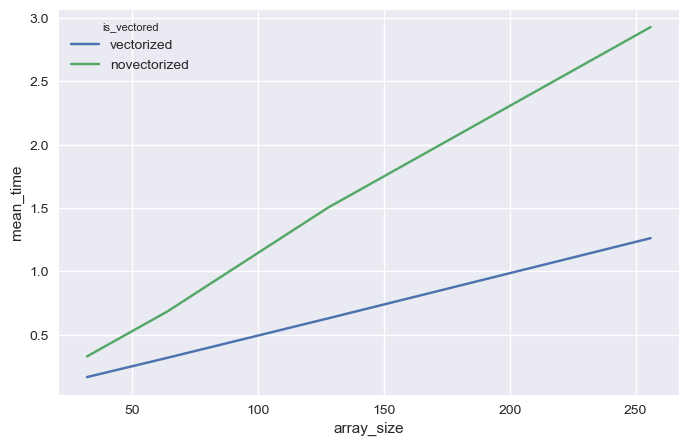

In [21]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

sns.lineplot(df, x='array_size', y='mean_time', hue='is_vectored', ax=ax)